In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))
%matplotlib inline

test.csv
train.csv



## Loading The Dataset

In [2]:
#loading the dataset.......(Train)
train = pd.read_csv("data/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
z_train = Counter(train['label'])
z_train

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

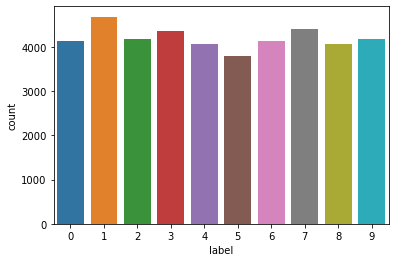

In [4]:
sns.countplot(train['label'])

In [7]:
#loading the dataset.......(Test)
test= pd.read_csv("data/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

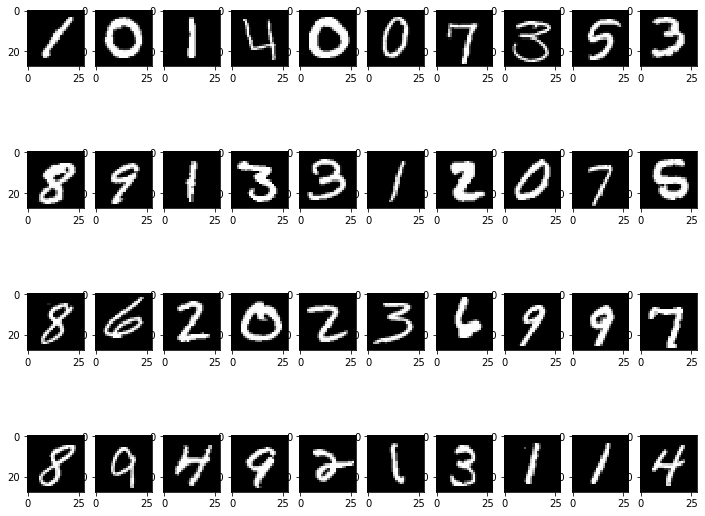

In [11]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest', cmap='gray')
plt.show()

## Normalising The Data 

Normalising data by dividing it by 255 should improve activation functions performance - sigmoid function works more efficiently with data range 0.0-1.0.

Make sure you have normalised both train and test data.

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

## Printing The Shape Of The Datasets

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 784)
42000 train samples
28000 test samples


## Reshape To Match The Keras's Expectations

In [11]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
print('X_train shape now:', X_train.shape)

X_train shape now: (42000, 28, 28, 1)


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

In [14]:
# convert class vectors to binary class matrices One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 
                                     num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.1, 
                                                  random_state=42)
print(y_train.shape)
print(y_train)

(42000, 10)
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**The Model**

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, # Convolution layer consists of several convolution channels (depth or filters)
                 kernel_size=(3, 3), 
                 activation='relu', 
                 kernel_initializer='he_normal', # Initializer for the kernel weights matrix
                 input_shape=input_shape))
model.add(Conv2D(filters = 32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size = (2, 2))) # Input window.
model.add(Dropout(rate = 0.20)) # Float between 0 and 1. Fraction of the input units to drop.
model.add(Conv2D(filters = 64, 
                 kernel_size=(3, 3), 
                 activation='relu',
                 padding='same', # Results in padding with zeros evenly to the left/right or up/down of the input 
                                 # such that output has the same height/width dimension as the input.
                 kernel_initializer='he_normal'))
model.add(Conv2D(filters = 64, 
                 kernel_size=(3, 3), 
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 128, 
                 kernel_size=(3, 3), 
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal'))
model.add(Dropout(rate = 0.25))
model.add(Flatten()) # Flattens the input.
model.add(Dense(units = 128, # Dimensionality of the output space.
                activation='relu'))
model.add(BatchNormalization()) # Batch normalization applies a transformation to inputs that maintains 
                                # the mean output close to 0 and the output standard deviation close to 1.
model.add(Dropout(rate = 0.25))
model.add(Dense(units = num_classes, 
                activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.RMSprop(),
              metrics = ['accuracy']) # Metric values are displayed during fit().

In [18]:
# Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, 
# the learning rate is reduced.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            factor=0.5, 
                                            patience=3, 
                                            min_lr=0.0001,
                                            verbose=1)

In [19]:
# ImageDataGenerator() lets you augment your images in real-time while your model is still training. 
# You can apply any random transformations on each training image as it is passed to the model. 
# This helps to make your model more robust.

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [21]:
datagen.fit(X_train)

In [23]:
h = model.fit(datagen.flow(X_train,
                           Y_train, 
                           batch_size=batch_size),
              epochs = epochs, 
              validation_data = (X_val,Y_val),
              verbose = 1, 
              steps_per_epoch = X_train.shape[0] // batch_size,
              callbacks=[learning_rate_reduction])

Epoch 1/20
590/590 [==============================] - 51s 87ms/step - loss: 0.2164 - accuracy: 0.9330 - val_loss: 0.0699 - val_accuracy: 0.9783
Epoch 2/20
590/590 [==============================] - 56s 95ms/step - loss: 0.1059 - accuracy: 0.9667 - val_loss: 0.0359 - val_accuracy: 0.9864
Epoch 3/20
590/590 [==============================] - 48s 81ms/step - loss: 0.0804 - accuracy: 0.9748 - val_loss: 0.0297 - val_accuracy: 0.9893
Epoch 4/20
590/590 [==============================] - 46s 78ms/step - loss: 0.0693 - accuracy: 0.9788 - val_loss: 0.0229 - val_accuracy: 0.9919
Epoch 5/20
590/590 [==============================] - 46s 78ms/step - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.0355 - val_accuracy: 0.9886
Epoch 6/20
590/590 [==============================] - 46s 78ms/step - loss: 0.0573 - accuracy: 0.9828 - val_loss: 0.0245 - val_accuracy: 0.9924
Epoch 7/20
590/590 [==============================] - 46s 78ms/step - loss: 0.0520 - accuracy: 0.9845 - val_loss: 0.0337 - val_accuracy:

## Basic Simple Plot And Evaluation

In [26]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.017101, final accuracy: 0.993333


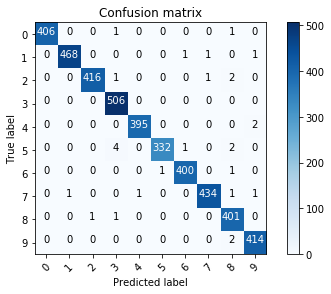

In [27]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, a nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

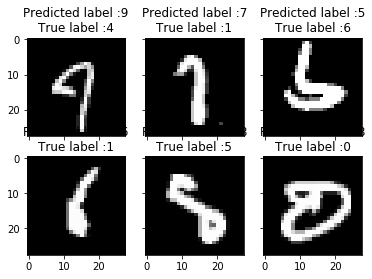

In [40]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)